In [83]:
import numpy
import scipy.special
import scipy.misc
import matplotlib.pyplot
import glob
%matplotlib inline

# neural network class definition
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):

        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        self.lr = learning_rate
        
        
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    # query the neural network
    def query(self, input_list):
        inputs = numpy.array(input_list, ndmin = 2).T
                    
        hidden_inputs = numpy.dot(self.wih, inputs)
                    
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
                    

In [84]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.1
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [85]:
# training data set
data_file = open("mnist_dataset/mnist_train.csv", 'r')
data_list = data_file.readlines()
data_file.close()

epochs = 5
for e in range(epochs):
    for record in data_list:
        all_values = record.split(',')
        scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(scaled_input, targets)
        pass
pass    

In [86]:
# our own image test data set
our_own_dataset = []

# load the png image data as test data set
for image_file_name in glob.glob('my_*.png'):
    
    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])
    
    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = scipy.misc.imread(image_file_name, flatten=True)
    
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    # append label and image data  to test data set
    record = numpy.append(label,img_data)
    our_own_dataset.append(record)
    
    pass

loading ...  my_2.png
0.01
1.0
loading ...  my_3.png
0.01
1.0
loading ...  my_4.png
0.01
1.0
loading ...  my_5.png
0.01
1.0
loading ...  my_6.png
0.01
0.984471


[[ 0.02716336]
 [ 0.00044879]
 [ 0.02092318]
 [ 0.00579516]
 [ 0.01101203]
 [ 0.33156489]
 [ 0.10315532]
 [ 0.00675825]
 [ 0.00305094]
 [ 0.00049751]]
network says  5


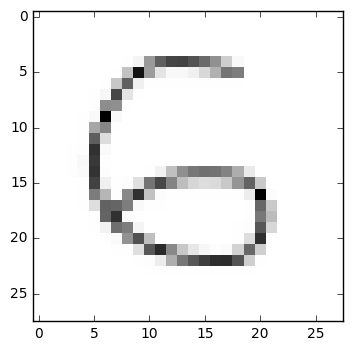

In [87]:
# test the neural network 

item = 4

# plot image
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says ", label)
